# Exploratory Data Analysis
## Diamond Price Prediction

### Data Description
#### There are 10 independent variables:

    id: Identification column.

    cut: Describe the cut quality of the cubic zirconia. Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.

    color: Colour of the cubic zirconia, with D being the best and J the worst.

    clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

    carat: Carat weight of the cubic zirconia.
    
    depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

    table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

    X: Length of the cubic zirconia in mm.

    Y: Width of the cubic zirconia in mm.

    Z: Height of the cubic zirconia in mm.

    Target variable:

    price: Price of the Diamond.

- [Dataset Link](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)
- [Domain Expertise Reference](https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/)

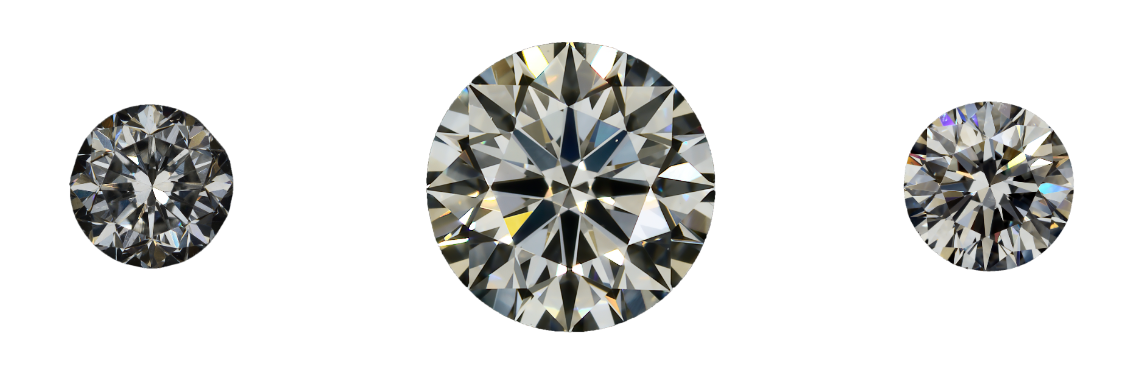

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.shape

(193573, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


#### TODO:
    - Convert Objects to Categorical Data
    - Check Correlation between Features
    - Scatter Plots between Features
    - Feature Extraction
    - Feature Selection

In [7]:
# Removing unnecessary ID column
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
df.duplicated().sum()

0

In [9]:
# Segregating Numerical and Categorical Feautures
numerical_cols = df.columns[df.dtypes!='object']
categorical_cols = df.columns[df.dtypes=='object']
print(numerical_cols)
print(categorical_cols)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categorical_cols].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [11]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [12]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [13]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

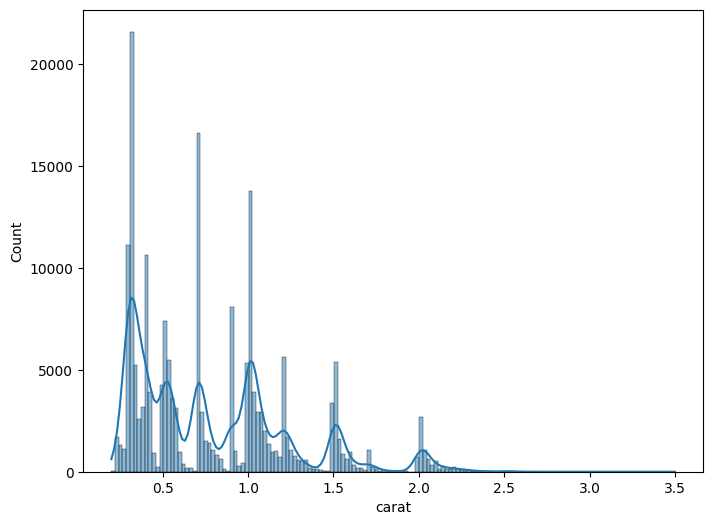

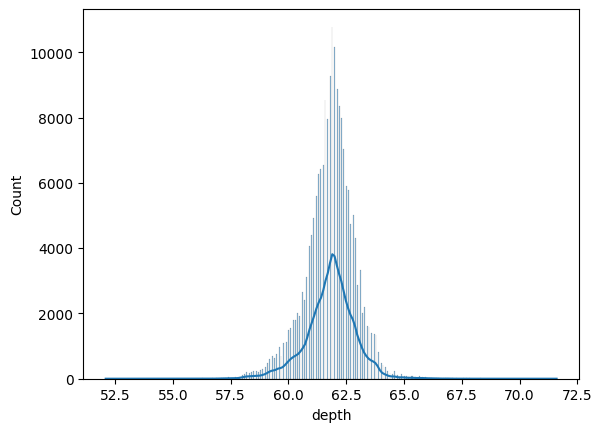

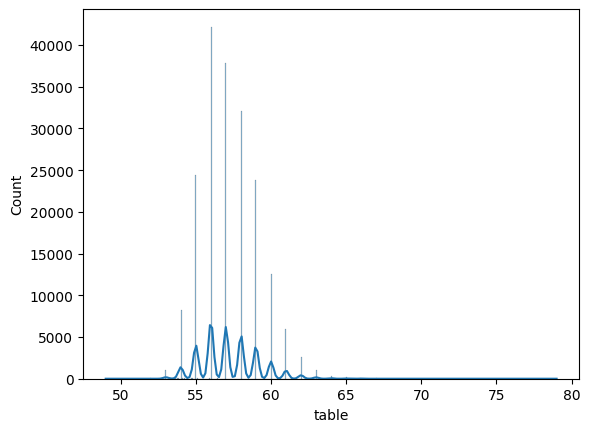

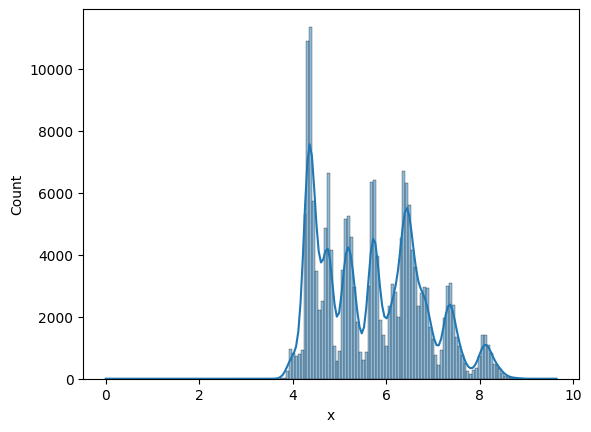

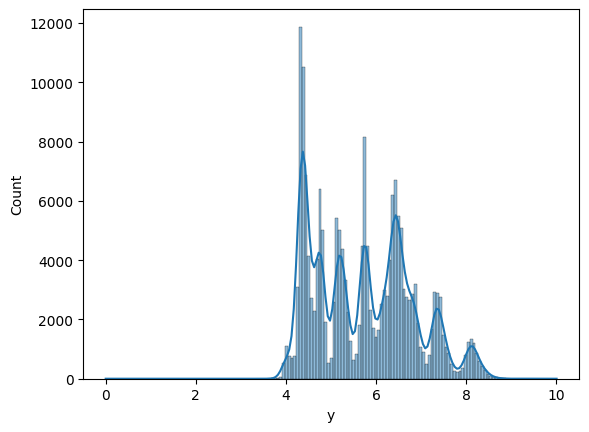

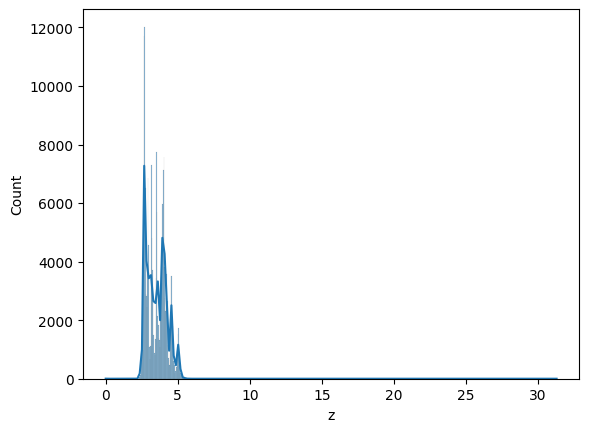

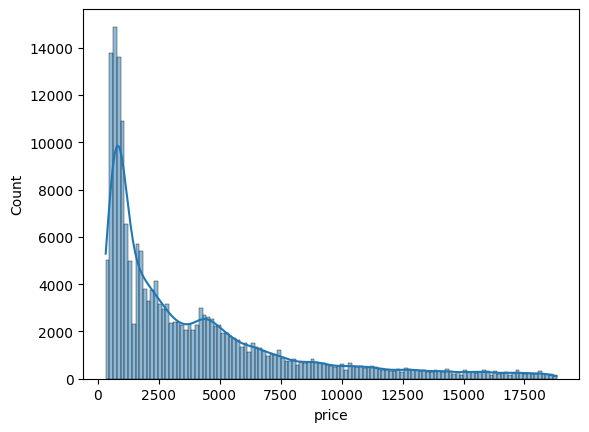

In [14]:
%matplotlib inline
plt.figure(figsize=(8,6))
for col in numerical_cols:
    sns.histplot(data=df,x=col,kde=True)
    print('\n')
    plt.show()

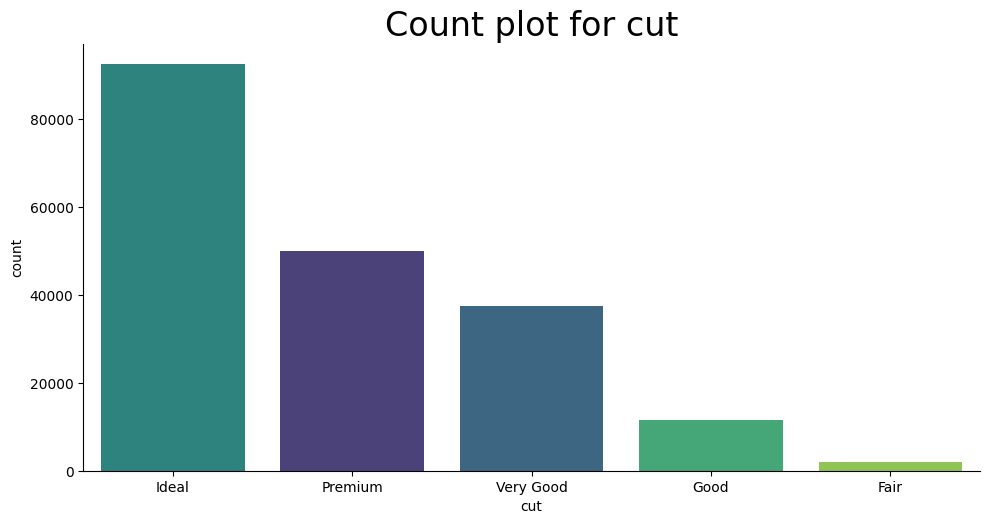

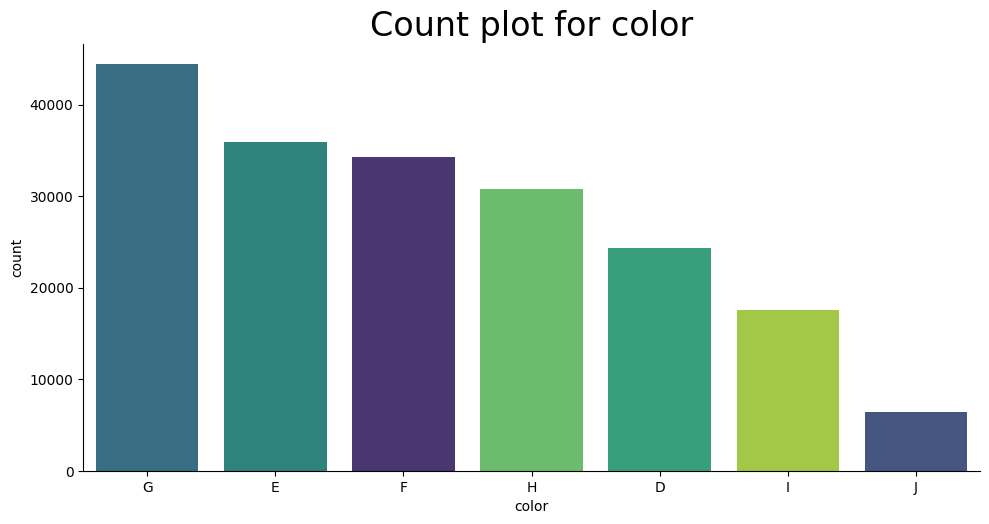

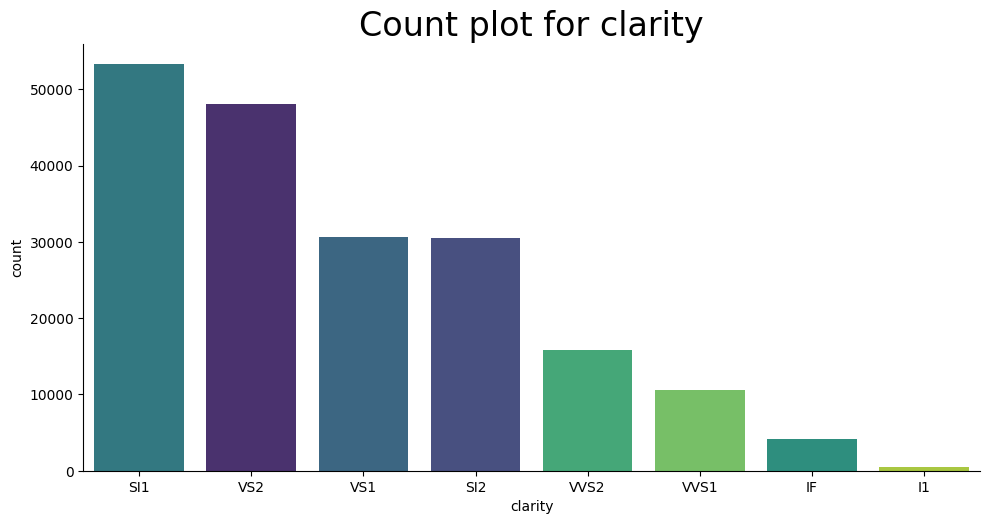

In [15]:
for ccol in categorical_cols:
    sns.catplot(data=df, x=ccol, kind='count', hue=ccol, aspect=2, palette='viridis',order=df[ccol].value_counts().index)
    plt.title(f'Count plot for {ccol}',size=24)
    plt.show()

### **Correlation**

<Axes: >

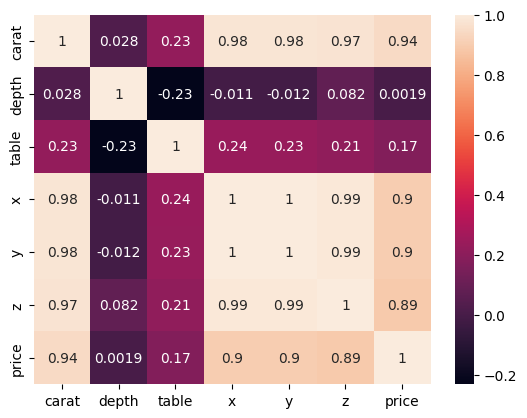

In [17]:
sns.heatmap(data=df[numerical_cols].corr(),annot=True)

In [21]:
# Dropping Highly correlated columns
df = df.drop(labels=['x','y','z'],axis=1)

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


In [23]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

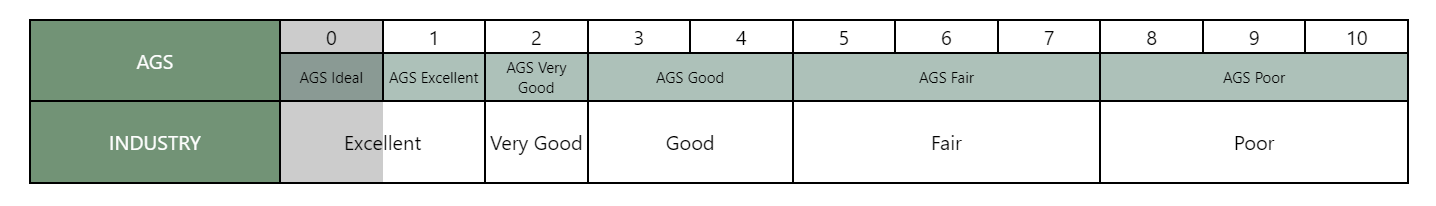

In [24]:
cut_map  = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [25]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

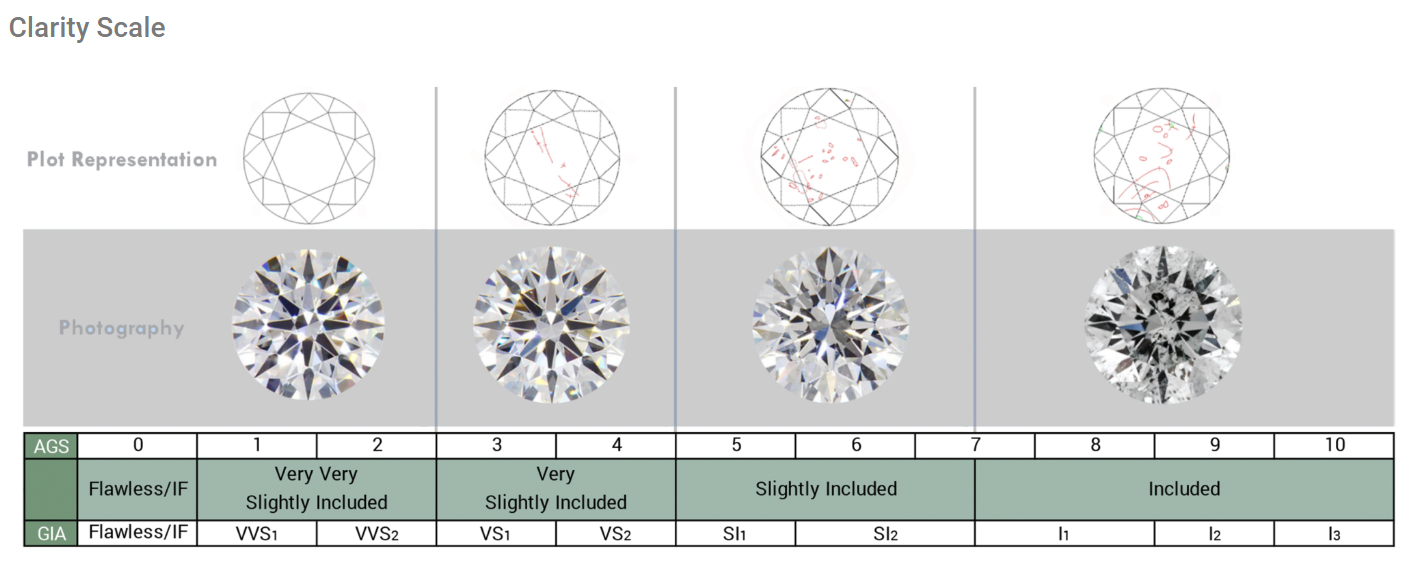

In [26]:
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [27]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

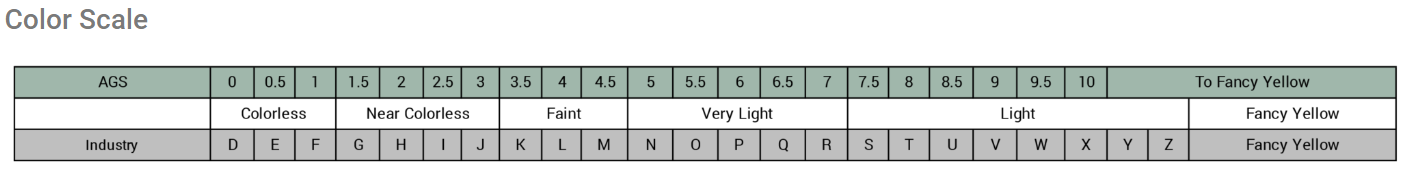

In [28]:
color_map  = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}

In [29]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,4,5,4,62.2,58.0,13619
1,2.03,3,1,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453
